# Predicting Tsunami Occurences from Earthquake Data

# Setup

In [ ]:
!pip install kaggle

In [5]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import zipfile

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Downloading data

In [6]:
# Path for saving the dataset
EARTHQUAKE_PATH = os.path.join("datasets", "earthquake")
ZIP_FILE_PATH = os.path.join(EARTHQUAKE_PATH, "earthquake-dataset.zip")

if not os.path.isdir(EARTHQUAKE_PATH):
    os.makedirs(EARTHQUAKE_PATH)

def fetch_earthquake_data(earthquake_path=EARTHQUAKE_PATH, zip_file_path=ZIP_FILE_PATH):
    os.system(f'kaggle datasets download -d warcoder/earthquake-dataset -p {earthquake_path} --force')

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(earthquake_path)
    
    return earthquake_path

# Fetch and unzip the dataset
dataset_path = fetch_earthquake_data()

# Load the CSV file
csv_file_path = os.path.join(dataset_path, "earthquake_1995-2023.csv")
earthquakes = pd.read_csv(csv_file_path)

# Display first few rows of the dataset
earthquakes.head()

Dataset URL: https://www.kaggle.com/datasets/warcoder/earthquake-dataset
License(s): CC0-1.0


  0%|          | 0.00/77.7k [00:00<?, ?B/s]

100%|██████████| 77.7k/77.7k [00:00<00:00, 336kB/s]


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


# Cleaning the dataset

In [7]:
# Keep only necessary columns
columns_to_keep = ['magnitude', 'mmi', 'depth', 'latitude', 'longitude', 'tsunami']
earthquakes = earthquakes[columns_to_keep]

In [8]:
# Display first few rows of cleaned dataset
earthquakes.head()

,magnitude,mmi,depth,latitude,longitude,tsunami
0,6.5,4,192.955,-13.8814,167.1580,0
1,6.5,6,69.727,12.8140,-88.1265,0
2,6.6,5,171.371,-38.1911,-70.3731,0
3,7.2,6,32.571,54.3844,-160.6990,1
4,7.3,5,21.000,54.4900,-160.7960,1


In [9]:
# Check dataset size
print(f"Dataset size: {earthquakes.shape}")

Dataset size: (1000, 6)


In [10]:
# Show summary of the dataset
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   mmi        1000 non-null   int64  
 2   depth      1000 non-null   float64
 3   latitude   1000 non-null   float64
 4   longitude  1000 non-null   float64
 5   tsunami    1000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 47.0 KB


In [11]:
# Statistics summary
earthquakes.describe()

,magnitude,mmi,depth,latitude,longitude,tsunami
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,6.02700,74.612541,4.315554,51.486576,0.325000
std,0.438148,1.43399,130.812590,26.633320,117.478302,0.468609
min,6.500000,1.00000,2.700000,-61.848400,-179.968000,0.000000
25%,6.600000,5.00000,16.000000,-13.518500,-71.694450,0.000000
50%,6.800000,6.00000,29.000000,-2.443500,107.791000,0.000000
75%,7.100000,7.00000,55.000000,25.167250,148.364750,1.000000
max,9.100000,10.00000,670.810000,71.631200,179.662000,1.000000


# Visualisation

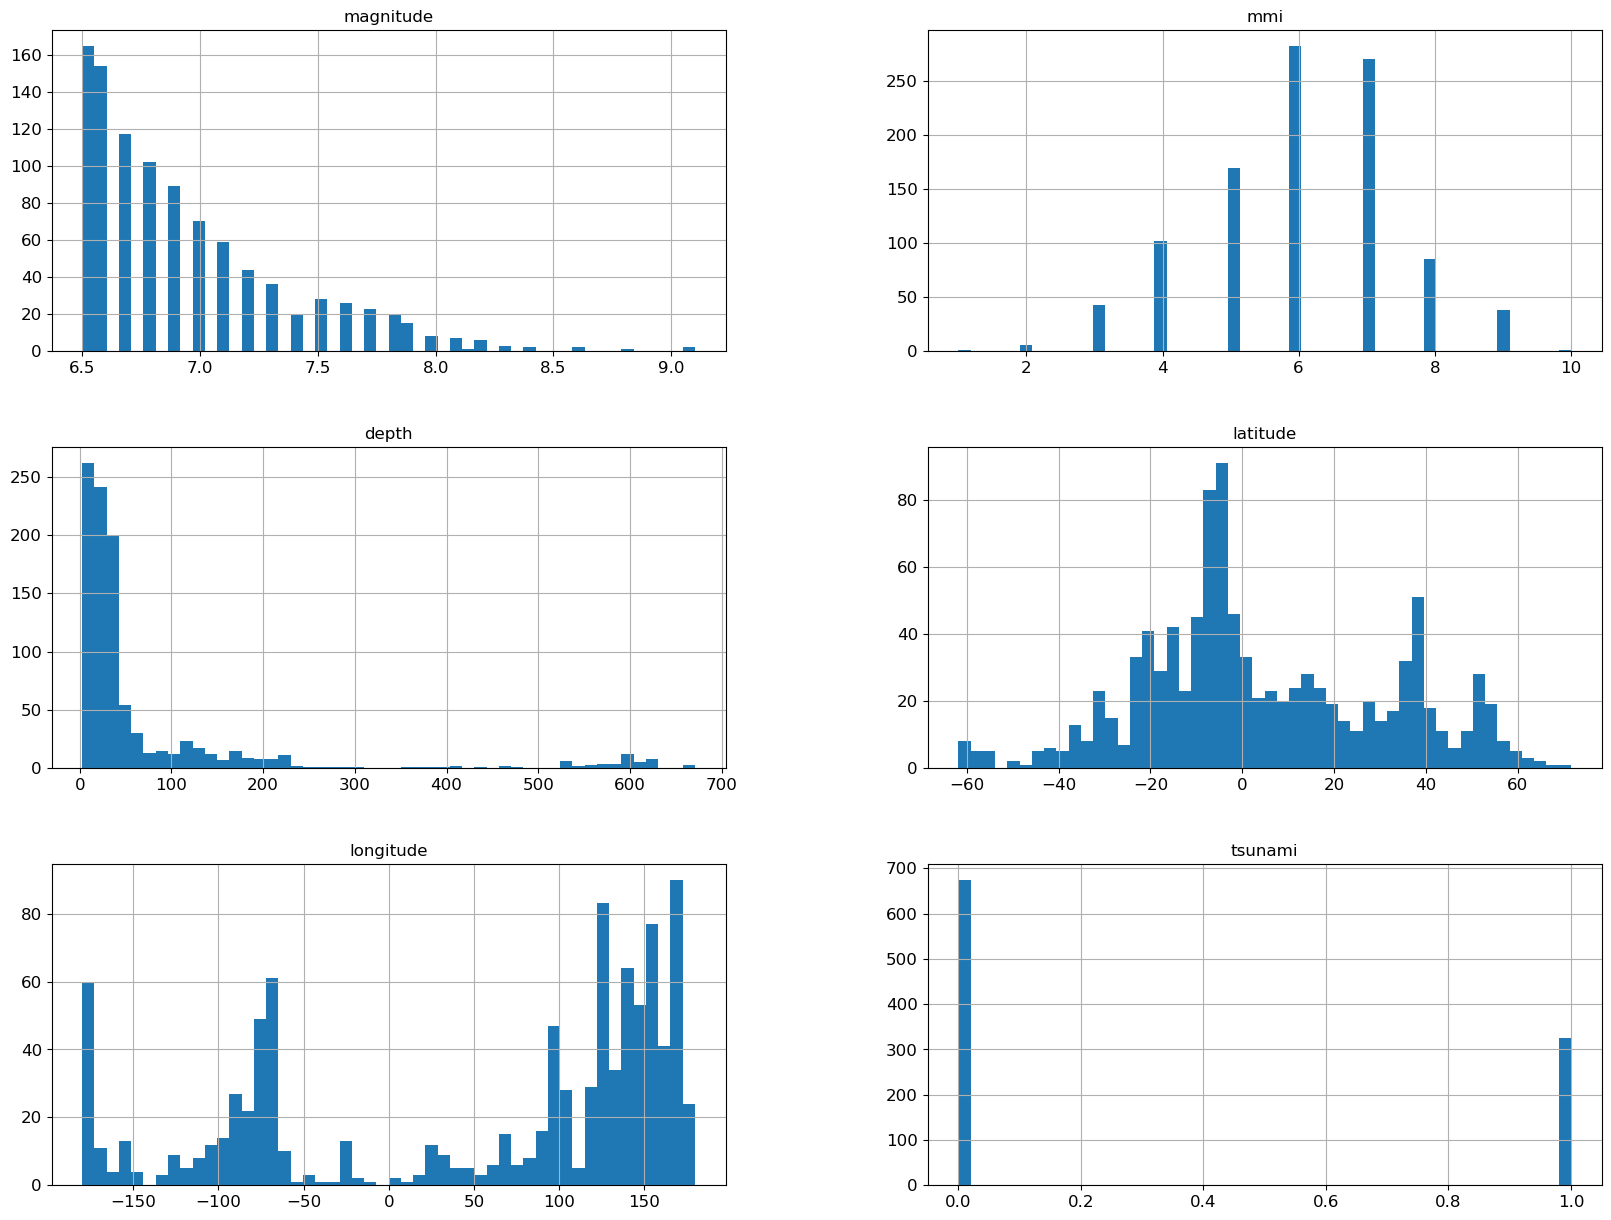

In [12]:
# Histograms
earthquakes.hist(bins=50, figsize=(20,15))
plt.show()

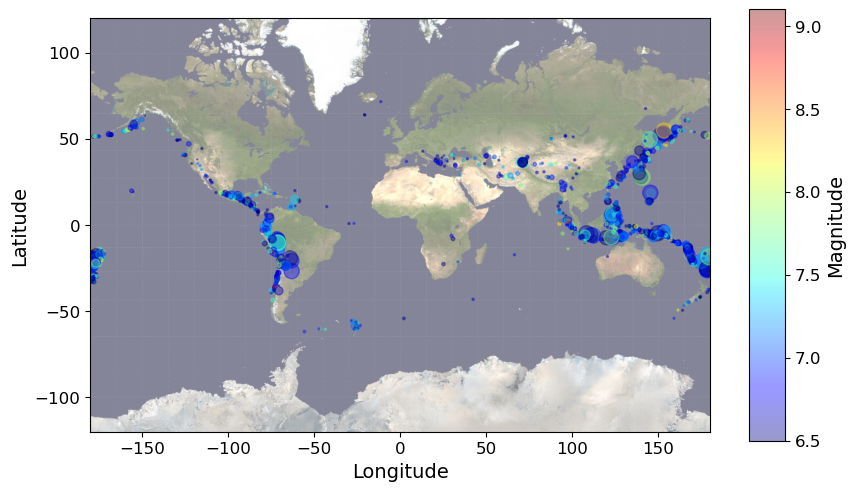

In [13]:
import urllib.request
import matplotlib.image as mpimg

# Set up project directory
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)

# Image URL
world_map_url = "https://upload.wikimedia.org/wikipedia/commons/7/74/Mercator-projection.jpg"
filename = "mermap.jpg" 
print("Downloading", filename)
urllib.request.urlretrieve(world_map_url, os.path.join(images_path, filename))

# Read the image
world_map_img = mpimg.imread(os.path.join(images_path, filename))

# Create a scatter plot on top of the world map
ax = earthquakes.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), alpha=0.4,
                      s=earthquakes["depth"] / 5, c=earthquakes["magnitude"],
                      cmap='jet', colorbar=False)

# Overlay the world map image
plt.imshow(world_map_img, extent=[-180, 180, -120, 120], alpha=0.5)

# Set labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Add a colour bar
cbar = plt.colorbar(ax.collections[0], label='Magnitude', aspect=12, shrink=0.8)

# Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from scipy.stats import randint
from sklearn.model_selection import KFold

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from seaborn import heatmap

In [15]:
# Split the data into features (X) and target (y)
X = earthquakes.drop('tsunami', axis=1)
y = earthquakes['tsunami']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Fit random forest model to data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# k-fold cross-validation, k = 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_val_score(rf, X_train, y_train, cv=kf)

y_train_pred = rf.predict(X_train)

# Evaluate training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Evaluate test set
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation scores
print("Cross-validation score for each fold: ", cv_results)
print(f"Average cross-validation score across 5 folds: {cv_results.mean():.2f}")
print("")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Error: {train_error:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print("")
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Error: {error:.2f}")
print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")

Cross-validation score for each fold:  [0.7125  0.79375 0.71875 0.75    0.74375]
Average cross-validation score across 5 folds: 0.74

Training Accuracy: 1.00
Training Error: 0.00
Training Precision: 1.00
Training Recall: 1.00

Validation Accuracy: 0.70
Validation Error: 0.30
Validation Precision: 0.55
Validation Recall: 0.47


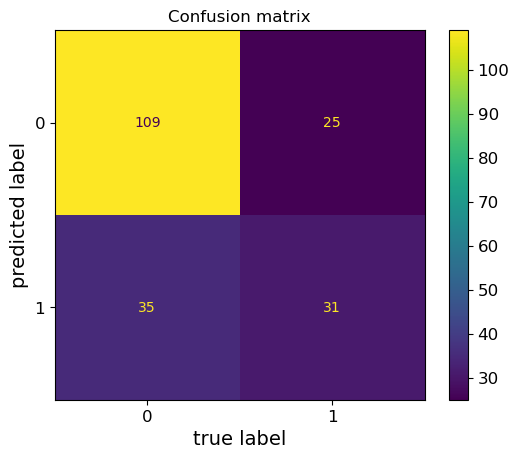

In [17]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix_).plot();
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion matrix')
plt.show()

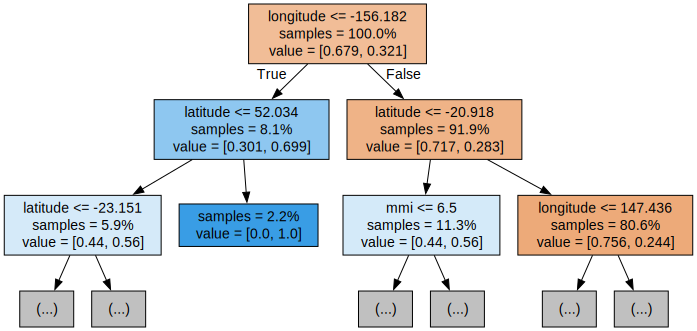

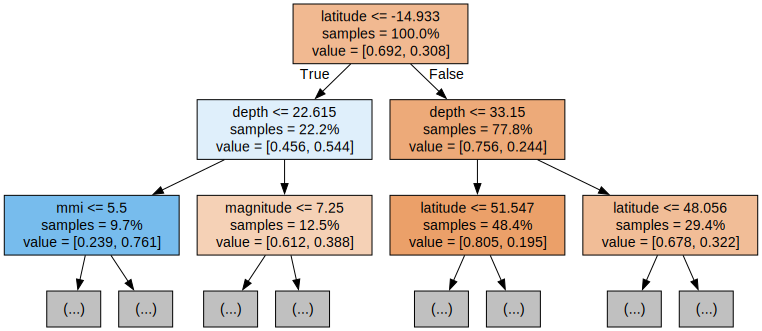

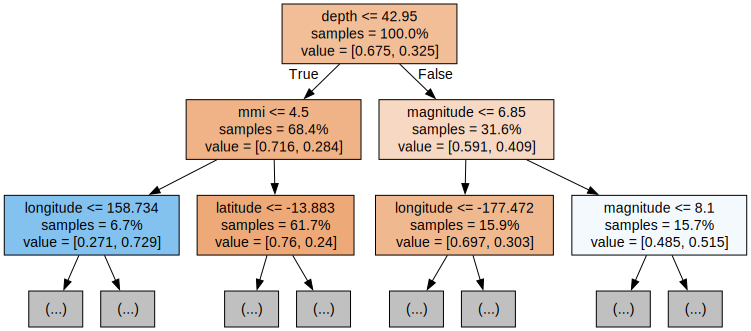

In [18]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [27]:
y = earthquakes["tsunami"].to_numpy()
X = earthquakes.drop("tsunami", axis=1).to_numpy().reshape(-1,5)
#varmistus
#print(X.shape)
#print(y.shape)

model = LogisticRegression().fit(X,y)
y_pred = model.predict(X)
accuracy = accuracy_score(y,y_pred)
cm = confusion_matrix(y,y_pred)

print(accuracy) #only about 0.7 for one run
print(cm) # too many false negatives

#now with splitting
X_fold, X_test, y_fold, y_test = train_test_split(X,y, test_size=0.15,train_size=0.85,shuffle=True)
# set aside X_test and y_test for final model testing
skf = StratifiedKFold(n_splits=5,shuffle=True)
#print(rkf.get_n_splits(X_fold,y_fold))
#for train, test in rkf.split(X_fold,y_fold):
#    print("%s %s" % (train,test))

#model2 = LogisticRegression()
acc_cum = 0
for i, (train,val) in enumerate(skf.split(X_fold,y_fold)):
    model2 = LogisticRegression()
    X_train, X_val = X_fold[train], X_fold[val]
    y_train, y_val = y_fold[train], y_fold[val]
    
    model2.fit(X_train,y_train)
    y_pred2 = model2.predict(X_val)
    acc = accuracy_score(y_val,y_pred2)
    acc_cum += acc
    cm = confusion_matrix(y_val,y_pred2)
    print(f"accuracy on round {i}: {acc}, confusion matrix: \n{cm}\n")
    
print(f"Average accuracy of all the iterations: {acc_cum/5}\n")
    
#final testing with test values
final = LogisticRegression().fit(X_fold,y_fold)
y_predf = final.predict(X_test)
accuracy2 = accuracy_score(y_test,y_predf)
cm2 = confusion_matrix(y_test,y_predf)
mse = mean_squared_error(y_test,y_predf)

print(f"Accuracy score for final test set: {accuracy2}\n") #only about 0.7 for one run
print(f"Confusion matrix:\n{cm2}") # too many false negatives
print(f"Mean squared error: {mse}")

0.695
[[642  33]
 [272  53]]
accuracy on round 0: 0.7058823529411765, confusion matrix: 
[[109   5]
 [ 45  11]]

accuracy on round 1: 0.7176470588235294, confusion matrix: 
[[109   5]
 [ 43  13]]

accuracy on round 2: 0.6705882352941176, confusion matrix: 
[[106   8]
 [ 48   8]]

accuracy on round 3: 0.7176470588235294, confusion matrix: 
[[108   7]
 [ 41  14]]

accuracy on round 4: 0.6529411764705882, confusion matrix: 
[[103  12]
 [ 47   8]]

Average accuracy of all the iterations: 0.6929411764705883

Accuracy score for final test set: 0.7

Confusion matrix:
[[97  6]
 [39  8]]
Mean squared error: 0.3
